<a href="https://colab.research.google.com/github/AnhelinaKavaliova/MachineLearning/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Часть 1. Регрессия

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = np.array([[   1,    1,  50,    1],
              [   1,    1,  70,    1],
              [   1,    2,  75,    2],
              [   1,    5,  60,    1],
              [   1,    3, 145,    2],
              [   1,    0,  80,    1],
              [   1,    5, 150,    3],
              [   1,   10, 200,    3],
              [   1,    1,  45,    1],
              [   1,    2, 100,    2]])

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [ ]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [ ]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[  1.,   1.,  50.,   1.],
       [  1.,   1.,  70.,   1.],
       [  1.,   2.,  75.,   2.],
       [  1.,   5.,  60.,   1.],
       [  1.,   3., 145.,   2.],
       [  1.,   0.,  80.,   1.],
       [  1.,   5., 150.,   3.],
       [  1.,  10., 200.,   3.],
       [  1.,   1.,  45.,   1.],
       [  1.,   2., 100.,   2.]])

In [ ]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
W = np.random.randn(X.shape[1])
W

array([ 0.16496144,  0.85134181, -1.42133905, -0.15640688])

##Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [ ]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [ ]:
gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.30743488  4.62707307  4.89084654  4.08032813], error 3497.34645628356
Iter: 500, weights: [44.16812084 20.47639797  3.41922321 14.36416788], error 25.251124583799662
Iter: 1000, weights: [44.25617362 21.76891639  0.35361777 15.9731759 ], error 24.94148384878805
Iter: 1500, weights: [44.29025639 22.10425357 -0.62179866 16.53335782], error 24.909047381147964
Iter: 2000, weights: [44.30147739 22.20675493 -0.93281755 16.71478606], error 24.905328382010982
Iter: 2500, weights: [44.30507723 22.23919375 -1.03202675 16.77282164], error 24.904815976445267
Iter: 3000, weights: [44.30622679 22.24952691 -1.06367486 16.79134471], error 24.90472109283579
Iter: 3500, weights: [44.30659358 22.2528224  -1.07377085 16.79725427], error 24.904697802532656
Iter: 4000, weights: [44.30671059 22.25387364 -1.07699156 16.7991395 ], error 24.90469108285616
Iter: 4500, weights: [44.30674792 22.25420899 -1.078019   16.79974091], error 24.904689011486308
Final MSE: 24.904688358055235


array([44.30675981, 22.25431585, -1.07834641, 16.79993256])


LAMBDA 1e-06

Iter: 0, weights: [11.17628395  2.81366721  3.50763097  4.21957435], error 3541.950148858664
Iter: 500, weights: [44.18426615 20.47469044  3.2033461  14.53539506], error 25.221172560736555
Iter: 1000, weights: [44.262028   21.80833783  0.24997195 16.0293108 ], error 24.936555423453797
Iter: 1500, weights: [44.29458544 22.13791895 -0.69363537 16.56793442], error 24.907905271253462
Iter: 2000, weights: [44.30546868 22.23785859 -0.99596287 16.74410039], error 24.904958586000372
Iter: 2500, weights: [44.30898382 22.26956456 -1.09287667 16.80078198], error 24.90465441771446
Iter: 3000, weights: [44.31011228 22.27970982 -1.12394615 16.81896573], error 24.904622734486423
Iter: 3500, weights: [44.31047414 22.28296121 -1.13390684 16.82479605], error 24.90461934325335
Iter: 4000, weights: [44.31059016 22.28400352 -1.1371002  16.82666527], error 24.904618951485514
Iter: 4500, weights: [44.31062736 22.28433768 -1.13812397 16.82726453], error 24.904618897365427
Final MSE: 24.90461888

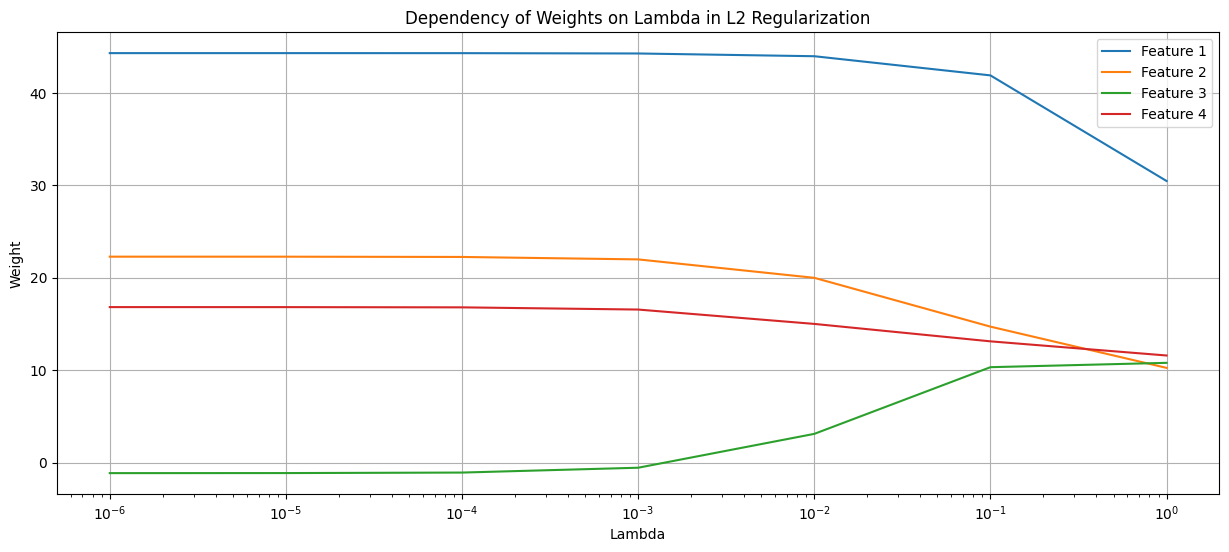

In [ ]:
lambda_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
feature_weights = []

for lmbda in lambda_values:
    print(f"\nLAMBDA {lmbda}\n")
    weights = gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-1, reg=lmbda)
    feature_weights.append(weights)

plt.figure(figsize=(15, 6))
for feature_index in range(X_norm.shape[1]):
    weights_for_feature = [weights[feature_index] for weights in feature_weights]
    plt.semilogx(lambda_values, weights_for_feature, label=f'Feature {feature_index+1}')

plt.xlabel('Lambda')
plt.ylabel('Weight')
plt.title('Dependency of Weights on Lambda in L2 Regularization')
plt.legend()
plt.grid(True)
plt.show()





*   При значениях lambda меньше 0.0001 наблюдается переобучение (MSE не уменьшается после определенного количества итераций)
*   При значении lambda равном 0.001 MSE начинает расти, что указывает на возможное недообучение

*   Значение lambda в диапазоне 0.001 - 0.0001 может быть оптимальным для данной модели и данных





##Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации

In [ ]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2/n * X.T @ (y_pred - y) #градиент функции ошибки
        dReg = reg * abs(W) #градиент L1-регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W


In [ ]:
gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.83580727  4.35246724  3.46976852  4.82940618], error 3468.331549832545
Iter: 500, weights: [44.18479711 20.57425121  3.02674751 14.6131191 ], error 25.19525967513449
Iter: 1000, weights: [44.26087246 21.80811018  0.22815149 16.04773418], error 24.935549932339466
Iter: 1500, weights: [44.29171927 22.11722036 -0.6618388  16.55686017], error 24.90838909767247
Iter: 2000, weights: [44.30194197 22.21091839 -0.9455916  16.7222671 ], error 24.905244134556106
Iter: 2500, weights: [44.30522531 22.2405235  -1.03610183 16.77520721], error 24.90480189929552
Iter: 3000, weights: [44.30627402 22.2499512  -1.06497485 16.79210567], error 24.90471790462435
Iter: 3500, weights: [44.30660864 22.25295776 -1.07418556 16.79749702], error 24.904696918021948
Iter: 4000, weights: [44.30671539 22.25391682 -1.07712386 16.79921694], error 24.904690814179524
Iter: 4500, weights: [44.30674945 22.25422276 -1.0780612  16.79976561], error 24.904688927148932
Final MSE: 24.904688331290593


array([44.3067603 , 22.25432026, -1.0783599 , 16.79994045])

##Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет
* Нормализация: Диапазон от 0 до 1 (или от -1 до 1)
* Стандартизация: Среднее 0, стандартное отклонение 1

Не рекомендуется применять нормализацию и стандартизацию одновременно к одному признаку, так как это может привести к искажению данных или потере информации




##Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов


In [ ]:
from sklearn import datasets
#from sklearn.preprocessing import MinMaxScaler

X, y= datasets.make_regression(n_samples=1000, n_features=2, noise=5, random_state=42)


In [ ]:
#scaler = MinMaxScaler()
#X_norm = scaler.fit_transform(X)


In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
W = np.random.randn(X.shape[1])
W

array([2.234331  , 0.29055352])

In [ ]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    classic_errors = []

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        classic_errors.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, classic_errors

In [ ]:
classic_weights, classic_errors = gradient_descent(X, y, iterations=500, eta=1e-2)

Iter: 0, weights: [0.17281892 0.39928965], error 1661.06095511517
Iter: 50, weights: [24.89182296  4.5484187 ], error 275.2480317918285
Iter: 100, weights: [34.60368712  5.96891786], error 62.77444122324363
Iter: 150, weights: [38.41973842  6.45314869], error 30.144517629250576
Iter: 200, weights: [39.91929091  6.61737042], error 25.126807545483082
Iter: 250, weights: [40.50859753  6.67272042], error 24.35436797006039
Iter: 300, weights: [40.74020354  6.69123529], error 24.2353524377078
Iter: 350, weights: [40.83123347  6.69737084], error 24.217001844485328
Iter: 400, weights: [40.86701359  6.69938016], error 24.214170813173336
Iter: 450, weights: [40.88107796  6.70002819], error 24.213733855585254
Final MSE: 24.213666388017867


In [ ]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    stochastic_errors = []

    n_batch = n // batch_size
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')

    for i in range(0, iterations):

        for b in range(n_batch):
            inds = np.random.randint(n, size=batch_size)

            X_tmp = X[inds, ]
            y_tmp = np.array(y)[inds]


            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)

            err = calc_mse(y, np.dot(X, W))
            stochastic_errors.append(err)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, stochastic_errors

In [ ]:
stochastic_weights, stochastic_errors = stohastic_gradient_descent(X, y, iterations=500, batch_size=100, eta=1e-2)

amount of batches is 10
Iter: 0, weights: [7.33996064 1.35662482], error 1096.3104122487027
Iter: 50, weights: [40.88582866  6.69706308], error 24.21368271971373
Iter: 100, weights: [40.99574004  6.69138709], error 24.22403222310295
Iter: 150, weights: [40.84652609  6.67963874], error 24.215866719015906
Iter: 200, weights: [40.86915171  6.73574058], error 24.21535191659039
Iter: 250, weights: [40.92172776  6.64668905], error 24.21752859886163
Iter: 300, weights: [40.87436193  6.6924204 ], error 24.213951241873612
Iter: 350, weights: [40.81710489  6.74362897], error 24.220502209790016
Iter: 400, weights: [40.91375497  6.73424029], error 24.215362552866374
Iter: 450, weights: [40.96258406  6.7107281 ], error 24.21861990151986
Final MSE: 24.213757653402208


In [ ]:
norm_stochastic_weights, norm_stochastic_errors = stohastic_gradient_descent(X, y, iterations=500, batch_size=4, eta=1e-2)

amount of batches is 250
Iter: 0, weights: [40.7984952   6.77578711], error 24.22724825959266
Iter: 50, weights: [41.26331535  6.63777087], error 24.346249784900966
Iter: 100, weights: [41.18740071  6.54165959], error 24.32092380103039
Iter: 150, weights: [40.75077214  7.10609579], error 24.401112653943084
Iter: 200, weights: [40.99290952  6.75311985], error 24.22633871651994
Iter: 250, weights: [40.88237852  7.22603779], error 24.498995994037045
Iter: 300, weights: [40.83880015  6.6997167 ], error 24.216096981825128
Iter: 350, weights: [40.82369792  6.70372848], error 24.21775276648053
Iter: 400, weights: [40.88607845  6.59432597], error 24.225271976587777
Iter: 450, weights: [41.08563591  7.06744667], error 24.388759363857506
Final MSE: 24.23672239195217


In [ ]:
print(len(classic_errors))
print(len(stochastic_errors))
print(len(norm_stochastic_errors))


500
5000
125000


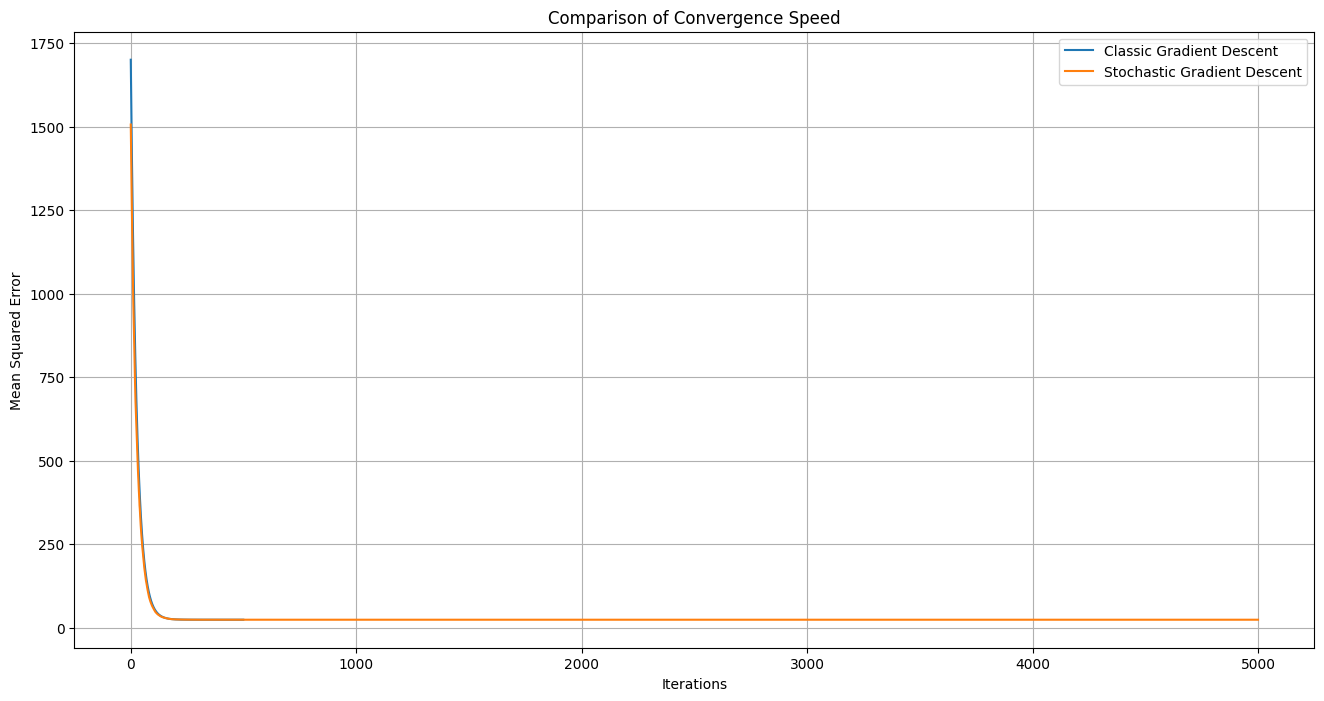

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(classic_errors)), classic_errors, label='Classic Gradient Descent')
plt.plot(range(len(stochastic_errors)), stochastic_errors, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Convergence Speed')
plt.legend()
plt.grid(True)
plt.show()


Из результатов итераций видно, что классический градиентный спуск сходится быстрее, чем стохастический градиентный спуск.

В классическом градиентном спуске ошибка уменьшается с каждой итерацией и достигает значения около 24.21 после 450 итераций.

В стохастическом градиентном спуске ошибка также уменьшается, но скорость сходимости медленнее. Ошибка сходится к значению около 24.21 после 450 итераций, однако она колеблется в процессе обучения, что может быть связано с случайным выбором мини-пакетов данных на каждой итерации.

Таким образом, классический градиентный спуск обычно имеет более стабильную сходимость и более предсказуемую динамику уменьшения ошибки по сравнению со стохастическим градиентным спуском. Однако стохастический градиентный спуск может быть предпочтителен в случаях больших объемов данных или когда данные не подходят для полной загрузки в память из-за ограниченных ресурсов.

#Часть 2. Классификация

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [ ]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [ ]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [ ]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [ ]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
z = np.linspace(-10, 10, 101)

In [ ]:
probabilities = sigmoid(z)

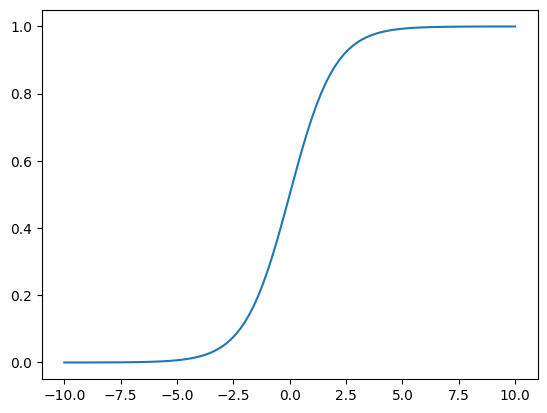

In [ ]:
plt.plot(z, probabilities)
plt.show()

##Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [ ]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred + 1e-100) + (1.0 - y) * np.log(1.0 - y_pred + 1e-100))
    return err

##Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [ ]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)

        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, err

In [ ]:
W, err = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.140535275330502
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.1034884426224387
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


In [ ]:
best_eta = None
best_loss = float('inf')
best_itter = None

for eta in [1e-2, 1e-3, 1e-4, 1e-5]:
  for itter in [100, 200, 500, 1000]:
      W, loss = eval_model(X_st, y, iterations=itter, eta=eta)
      #loss = calc_logloss(y, sigmoid(np.dot(X, W)))
      print(f"eta={eta}, loss={loss}, itter={itter}")

      if loss < best_loss:
          best_loss = loss
          best_eta = eta
          best_itter = itter


print(f"Best eta: {best_eta}, Best loss: {best_loss}, Beat itteration: {best_itter}")


0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
10 [ 0.45716545 -0.29020457  0.64358435  1.46353934] 0.9439281874655927
20 [ 0.42583815 -0.41002318  0.63860792  1.41613249] 0.7629674823832604
30 [ 0.39946014 -0.50547751  0.63475526  1.37761452] 0.6444556387219081
40 [ 0.37794133 -0.57330754  0.63392622  1.34919108] 0.5817430955038271
50 [ 0.36027236 -0.61870558  0.63600367  1.32917611] 0.5520011913232798
60 [ 0.34529934 -0.64913519  0.64002293  1.31503971] 0.5374805333625672
70 [ 0.3321925  -0.66994677  0.64521411  1.30488943] 0.529743381176863
80 [ 0.32041408 -0.68443409  0.65110213  1.29750127] 0.5251782755939146
90 [ 0.30961151 -0.69463063  0.65740053  1.29208161] 0.5221864742903717
eta=0.01, loss=0.5202099204174199, itter=100
0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
20 [ 0.42583815 -0.41002318  0.63860792  1.41613249] 0.7629674823832604
40 [ 0.37794133 -0.57330754  0.63392622  1.34919108] 0.5817430955038271
60 [ 0.34529934 -0.649

Best eta: 0.01, Best loss: 0.47648567288032373, Beat itteration: 1000

##Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [ ]:
W, err = eval_model(X_st, y, iterations=1000, eta=1e-2)

0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
100 [ 0.29954562 -0.70184086  0.66393101  1.28809857] 0.5200176817937363
200 [ 0.21783205 -0.71711535  0.72830416  1.28039917] 0.5083938298746018
300 [ 0.15081179 -0.71601562  0.78172777  1.29014996] 0.500908097886405
400 [ 0.09214433 -0.71718068  0.82443144  1.306414  ] 0.49535059743739646
500 [ 0.03982235 -0.72064774  0.8585723   1.32719824] 0.49098749514946327
600 [-0.00760312 -0.72573949  0.88595525  1.35123708] 0.48737496424720916
700 [-0.05125883 -0.73192167  0.90799082  1.37755197] 0.4842468146117195
800 [-0.0920137  -0.7388      0.92576955  1.40539219] 0.4814434848660955
900 [-0.13053215 -0.7460864   0.94013195  1.43419101] 0.47886846544307693


In [ ]:
def calc_pred_proba(X, W):
  z = np.dot(X, W)
  y_pred_proba = sigmoid(z)

  return y_pred_proba

In [ ]:
y_pred_proba = calc_pred_proba(X_st, W)
y_pred_proba

array([0.40385615, 0.5007704 , 0.69231032, 0.03889726, 0.80709023,
       0.7216841 , 0.8154135 , 0.21405664, 0.38047102, 0.7860997 ])

##Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).


In [ ]:
W, err = eval_model(X_st, y, iterations=1000, eta=1e-2)

0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
100 [ 0.29954562 -0.70184086  0.66393101  1.28809857] 0.5200176817937363
200 [ 0.21783205 -0.71711535  0.72830416  1.28039917] 0.5083938298746018
300 [ 0.15081179 -0.71601562  0.78172777  1.29014996] 0.500908097886405
400 [ 0.09214433 -0.71718068  0.82443144  1.306414  ] 0.49535059743739646
500 [ 0.03982235 -0.72064774  0.8585723   1.32719824] 0.49098749514946327
600 [-0.00760312 -0.72573949  0.88595525  1.35123708] 0.48737496424720916
700 [-0.05125883 -0.73192167  0.90799082  1.37755197] 0.4842468146117195
800 [-0.0920137  -0.7388      0.92576955  1.40539219] 0.4814434848660955
900 [-0.13053215 -0.7460864   0.94013195  1.43419101] 0.47886846544307693


In [ ]:
def  calc_pred(X, W):
  y_pred_proba = calc_pred_proba(X, W)
  y_pred = np.where(y_pred_proba > 0.5, 1, 0)


  return y_pred

In [ ]:
y_pred = calc_pred(X_st, W)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

##Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score

In [ ]:
def accuracy(y_pred, y):
  accuracy = (y_pred == y).sum() / len(y)
  return accuracy

In [ ]:
acc = accuracy(y_pred, y)
acc

0.7

In [ ]:
def confusion_matrix(y_pred, y):
  confusion_matrix = np.zeros((2, 2))
  for i in range(len(y)):
      confusion_matrix[int(y[i]), int(y_pred[i])] += 1
  return confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_pred, y)
conf_mat

array([[3., 2.],
       [1., 4.]])

In [ ]:
def precision(y_pred, y):
  conf_mat = confusion_matrix(y_pred, y)
  tp = conf_mat[1][1]
  fp = conf_mat[0][1]

  return tp / (tp + fp)

In [ ]:
precision_val = precision(y_pred, y)
precision_val

0.6666666666666666

In [ ]:
def recall(y_pred, y):
  conf_mat = confusion_matrix(y_pred, y)
  tp = conf_mat[1][1]
  fn = conf_mat[1][0]

  return tp / (tp + fn)

In [ ]:
recall_val = recall(y_pred, y)
recall_val

0.8

In [ ]:
def f1_score(y_pred, y):
    precision_val = precision(y_pred, y)
    recall_val = recall(y_pred, y)
    f1_score_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
    return f1_score_val

In [ ]:
f1 = f1_score(y_pred, y)
f1

0.7272727272727272

##Могла ли модель переобучиться? Почему?


Да, могла. Маленький размер набора данных, подстравивание под данные